<a href="https://colab.research.google.com/github/nikolgiannoukakou/finalessay_edde2/blob/main/%CE%94%CE%B9%CF%80%CE%BB%CF%89%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE_%CE%9D%CE%B9%CE%BA%CE%BF%CE%BB%CE%AD%CF%84%CE%B1_%CE%93%CE%B9%CE%B1%CE%BD%CE%BD%CE%BF%CF%85%CE%BA%CE%AC%CE%BA%CE%BF%CF%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [249]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
path1='/content/drive/MyDrive/Colab Notebooks'


In [251]:
df= pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Αφαιρούμε τις τιμές που λείπουν

In [252]:
# Έλεγχος κενών τιμών
print("Σύνολο δεδομένων: "+str(df.shape))
print("Κενές τιμές: \n"+str(df.isnull().sum()))

Σύνολο δεδομένων: (614, 13)
Κενές τιμές: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [253]:
# α. λίστα με κενές τιμές
missing_values = ["n/a", "na", "--", 999,9999]
# β. Replace
df.replace(to_replace = missing_values, value = np.nan, inplace = True)
# γ. Drop NaNs
df.dropna(inplace=True)
# δ. Reindex για να μην μείνουν κενά στο index
df.reset_index(drop=True, inplace=True)
# Έλεγχος τιμών
print("Σύνολο δεδομένων: "+str(df.shape))

Σύνολο δεδομένων: (480, 13)


In [254]:
# Έλεγχος duplicates
df.duplicated().sum()

# Αφαίρεση duplicates
df = df.drop_duplicates()

In [255]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Αφαιρούμε τις τιμές που δεν μας ενδιαφέρουν

In [256]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Από το παρακάτω συμπεραίνουμε ότι οτι υπάρχουν 480 γραμμές και 12 στήλες στον κώδικα. Δηλαδή, οι αιτούντες ήταν 480 και οι μεταβλητές & τα 12 στο σύνολό τους αφού αφαιρέσαμε τη στήλη loan_id, η οποία δεν μας χρειάζεται στην έρευνά μας.

In [257]:
df.shape

(480, 12)

In [258]:
df_approved=[df['Loan_Status'].value_counts()['Y']]

df_approved

[332]

In [259]:
df_rejected=[df['Loan_Status'].value_counts()['N']]
df_rejected

[148]

Πόσα είναι τα εγκεκριμένα δάνεια σε σχέση με το σύνολό τους;


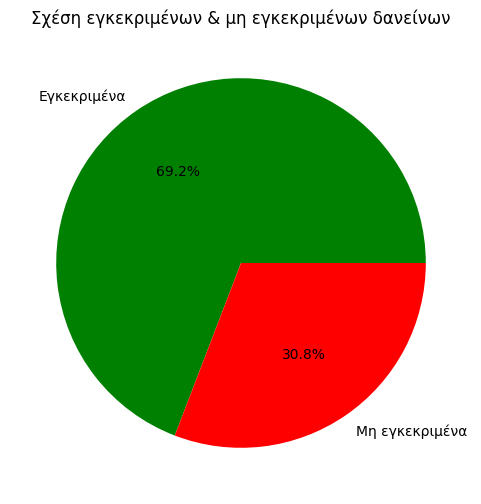

In [260]:
approval_ratio = df['Loan_Status'].value_counts()['Y'] / len(df)

plt.figure(figsize=(6, 6))
plt.pie([approval_ratio, 1 - approval_ratio], labels=['Εγκεκριμένα', 'Μη εγκεκριμένα'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Σχέση εγκεκριμένων & μη εγκεκριμένων δανείνων')
plt.show()


Ποιο είναι το μέσο ατομικό εισόδημα των αιτούντων με εγκεκριμένα δάνεια;

In [261]:
approved_loans = df[df['Loan_Status'] == 'Y']

average_income_approved = approved_loans['ApplicantIncome'].mean()
average_income_approved


5201.093373493976

Ποια είναι η διακύμανση των ποσών των δανείων;

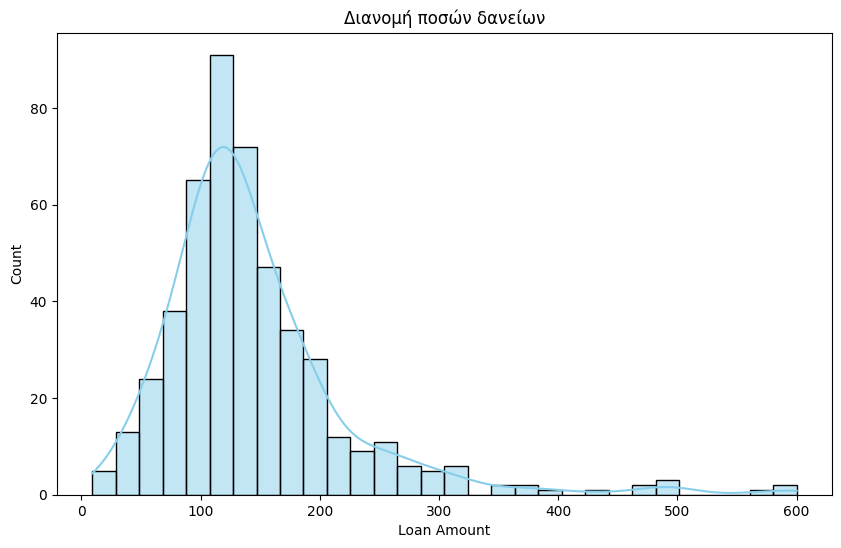

In [262]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='skyblue')

plt.title('Διανομή ποσών δανείων')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()




Που κυμαίνονται τα εισοδήματα των αιτούντων;


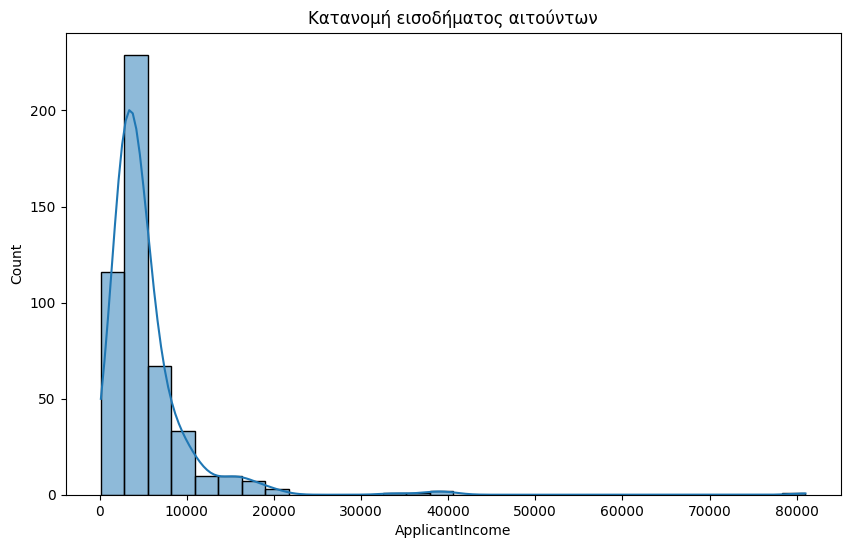

In [263]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ApplicantIncome', data=df, bins=30, kde=True)
plt.title('Κατανομή εισοδήματος αιτούντων')
plt.show()

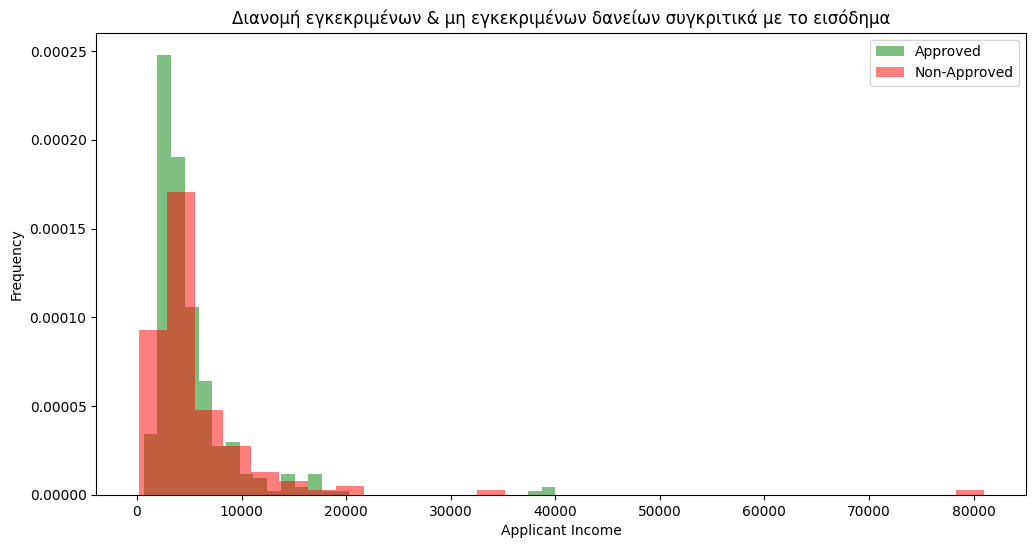

In [264]:
# Διαχωρισμός εγκεκριμένων και μη εγκεκριμένων δανείων
approved_loans = df[df['Loan_Status'] == 'Y']
non_approved_loans = df[df['Loan_Status'] == 'N']

# Δημιουργία histogram
plt.figure(figsize=(12, 6))
plt.hist(approved_loans['ApplicantIncome'], bins=30, color='green', alpha=0.5, label='Approved', density=True)
plt.hist(non_approved_loans['ApplicantIncome'], bins=30, color='red', alpha=0.5, label='Non-Approved', density=True)

plt.title('Διανομή εγκεκριμένων & μη εγκεκριμένων δανείων συγκριτικά με το εισόδημα')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.legend()
plt.show()


Οικογενειακή κατάσταση των αιτούντων

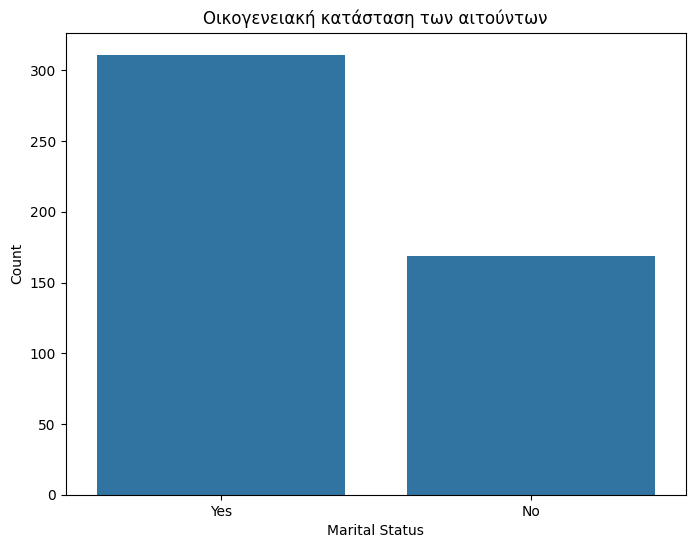

In [265]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=df)
plt.title('Οικογενειακή κατάσταση των αιτούντων')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Σύγκριση οικογενειακής κατάστασης και κατάστασης δανείου

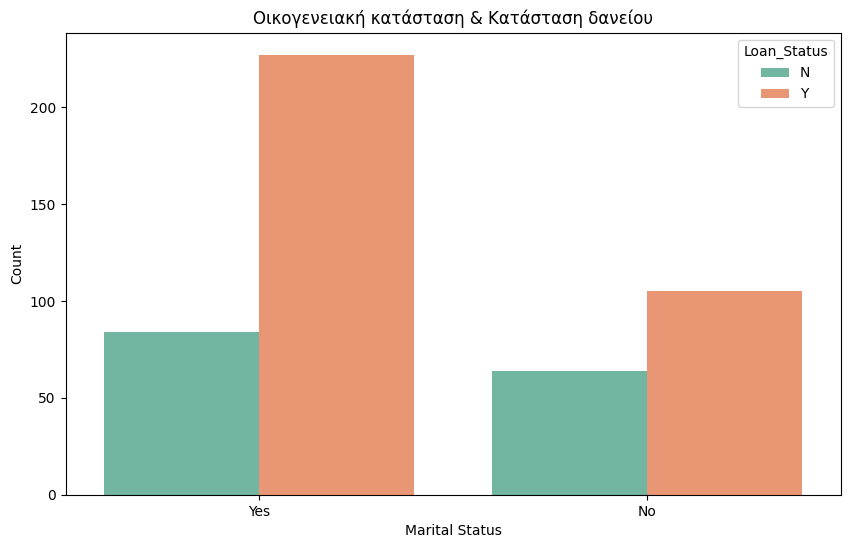

In [266]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=df, hue='Loan_Status', palette='Set2')
plt.title('Οικογενειακή κατάσταση & Κατάσταση δανείου')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Διανομή περιοχών των ακινήτων δανείου

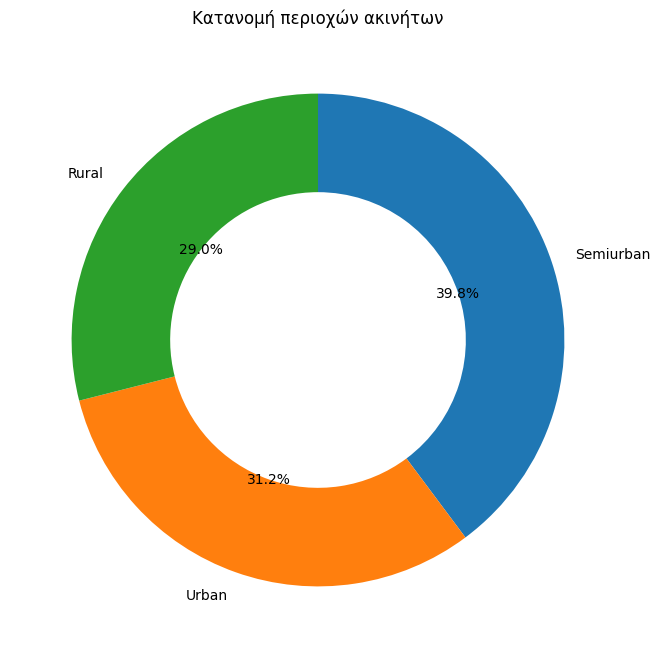

In [267]:
property_area_counts = df['Property_Area'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title('Κατανομή περιοχών ακινήτων')
plt.show()


Ποια είναι η πιο συχνή διάρκεια των δανείων;

<ipython-input-268-2e772be6cba5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_term_counts.index, y=loan_term_counts.values, palette='viridis')


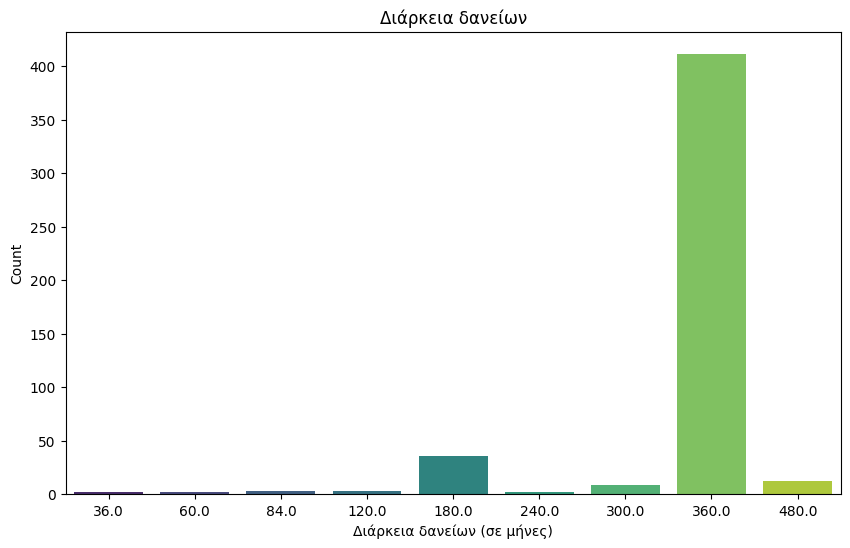

In [268]:
loan_term_counts = df['Loan_Amount_Term'].value_counts()
loan_term_counts = loan_term_counts.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_term_counts.index, y=loan_term_counts.values, palette='viridis')
plt.title('Διάρκεια δανείων')
plt.xlabel('Διάρκεια δανείων (σε μήνες)')
plt.ylabel('Count')
plt.show()


Πόσοι αιτούντες είναι αυτοαπασχολούμενοι;


<ipython-input-269-c207526337bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette='Set2')


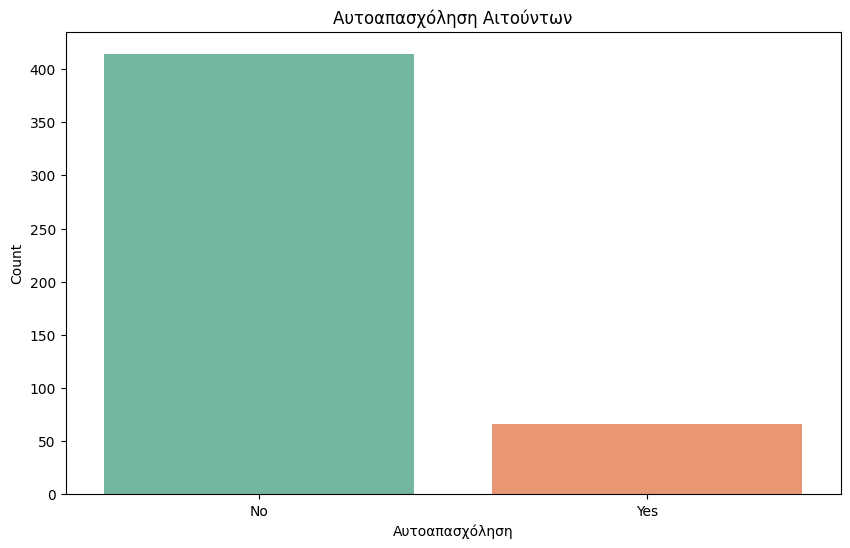

In [269]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', data=df, palette='Set2')
plt.title('Αυτοαπασχόληση Αιτούντων')
plt.xlabel('Αυτοαπασχόληση')
plt.ylabel('Count')
plt.show()

Επηρεάζουν την έγκριση δανείων τα εξαρτώμενα μέλη;

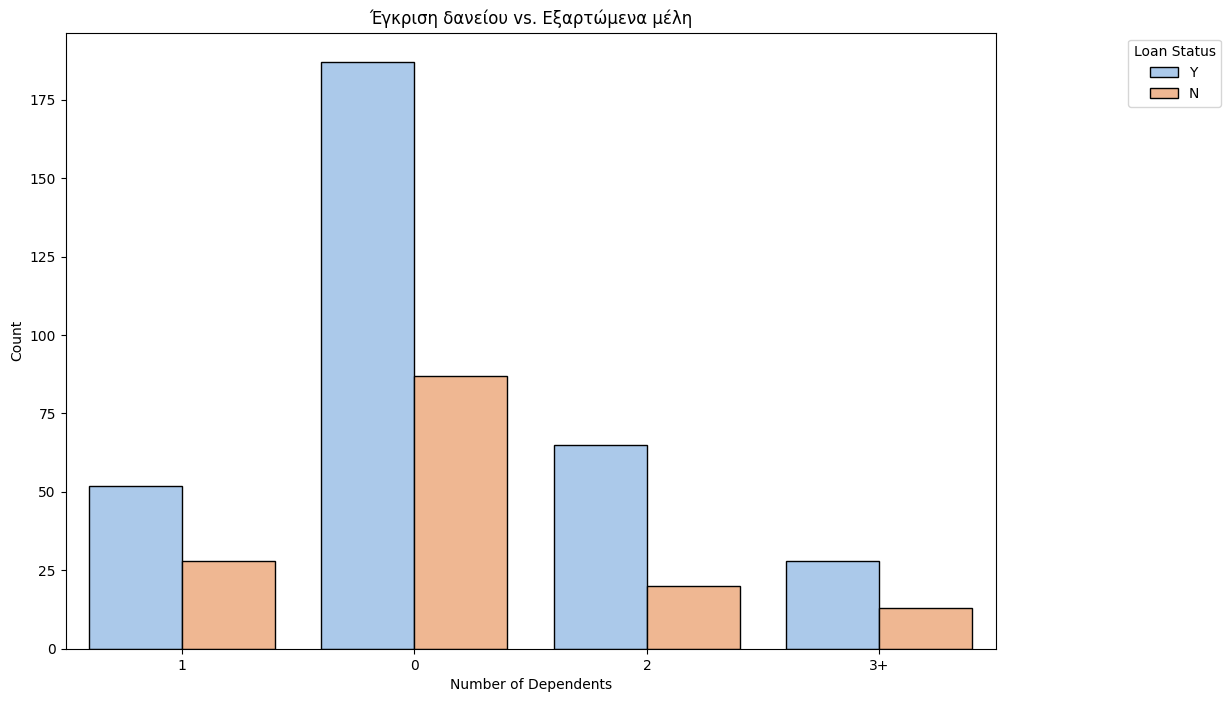

In [270]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Dependents', hue='Loan_Status', data=df, hue_order=['Y', 'N'], palette='pastel', edgecolor="k")
plt.title('Έγκριση δανείου vs. Εξαρτώμενα μέλη')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Ας συγκρίνουμε το πιστωτικό ιστορικό με την έγκριση δανείων.

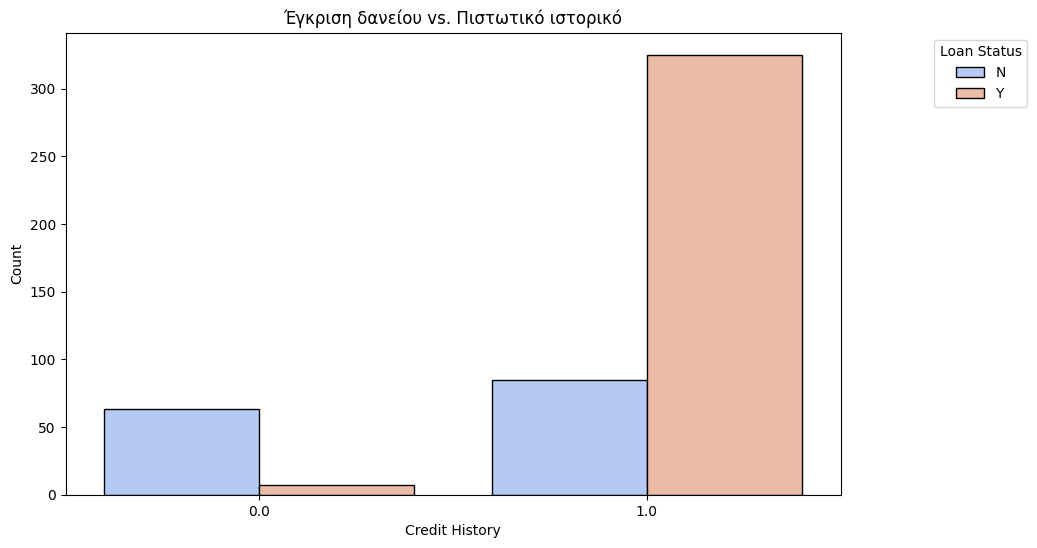

In [271]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='coolwarm', edgecolor="k")
plt.title('Έγκριση δανείου vs. Πιστωτικό ιστορικό')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Έγκριση και απόρριψη δανείων ανά περιοχή.

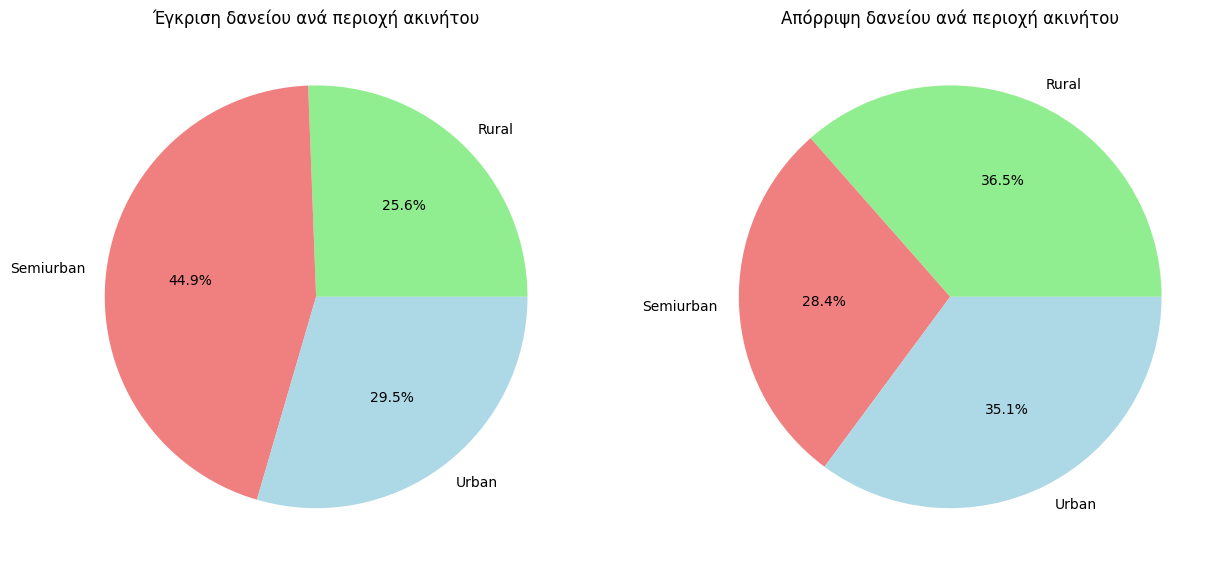

In [272]:
approval_by_property_area = df.pivot_table(index='Property_Area', columns='Loan_Status', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pie(approval_by_property_area['Y'], labels=approval_by_property_area.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
ax[0].set_title('Έγκριση δανείου ανά περιοχή ακινήτου')
ax[1].pie(approval_by_property_area['N'], labels=approval_by_property_area.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
ax[1].set_title('Απόρριψη δανείου ανά περιοχή ακινήτου')

plt.show()


Επηρεάζει το φύλο την έγκριση των δανείων;

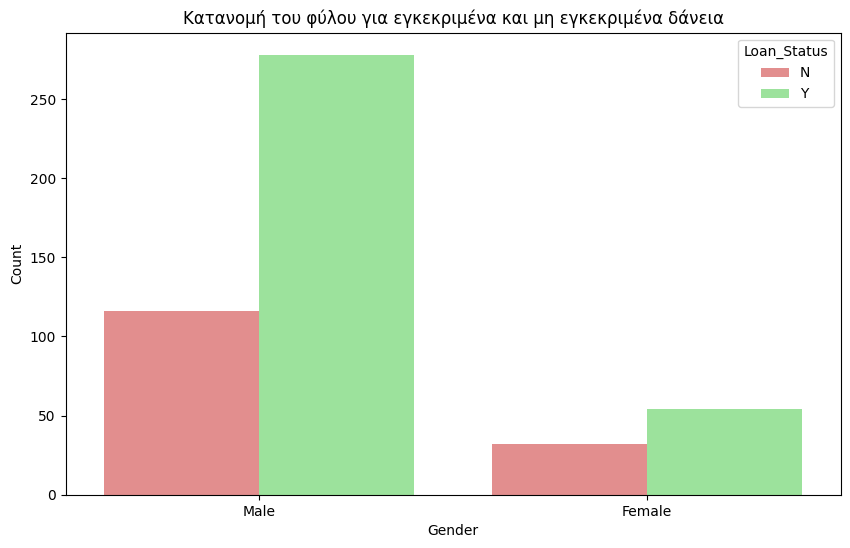

In [273]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette={'Y': 'lightgreen', 'N': 'lightcoral'})
plt.title('Κατανομή του φύλου για εγκεκριμένα και μη εγκεκριμένα δάνεια')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



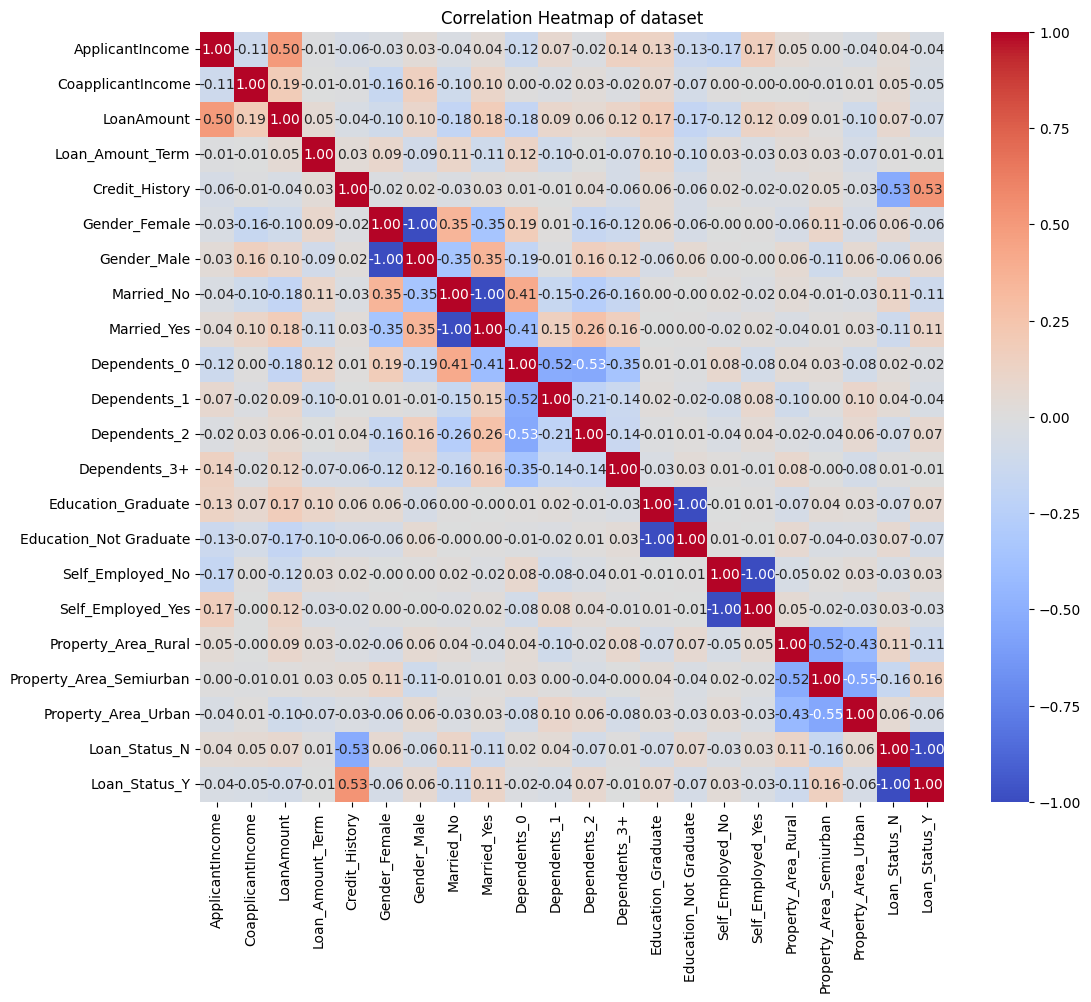

In [274]:
#correlation matrix
df_encoded = pd.get_dummies(df)

correlation_matrix = df_encoded.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of dataset')
plt.show()


Μετατροπή κατηγορικών μεταβλητών σε αρηθμιτικές

In [275]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Fill NaN values
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

label_encoder = LabelEncoder()

# Iterate through each categorical column and apply label encoding
for column in df.select_dtypes(include=['object']).columns:
    # Fit label encoder and transform the column
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0             4583   
1       1        1           0          0              1             3000   
2       1        1           0          1              0             2583   
3       1        0           0          0              0             6000   
4       1        1           2          0              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0       128.0             360.0             1.0   
1                0.0        66.0             360.0             1.0   
2             2358.0       120.0             360.0             1.0   
3                0.0       141.0             360.0             1.0   
4             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
0              0            0  
1              2            1  
2              2    

In [276]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
5,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
6,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
7,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
8,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
9,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


**Λογιστική παλινδρόμηση**



In [277]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit το μοντέλο
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        38
           1       0.77      1.00      0.87        82

    accuracy                           0.79       120
   macro avg       0.88      0.67      0.69       120
weighted avg       0.84      0.79      0.75       120



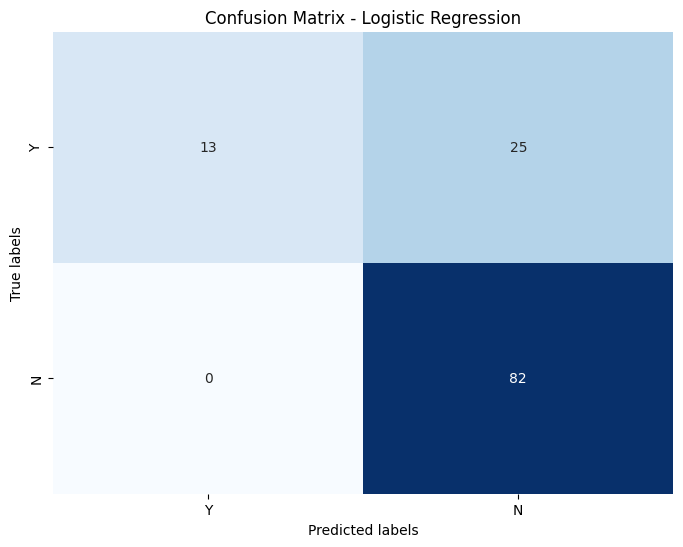

In [278]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(ticks=[0.5, 1.5], labels=['Y', 'N'])  # Adjust x-axis labels
plt.yticks(ticks=[0.5, 1.5], labels=['Y', 'N'])  # Adjust y-axis labels
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


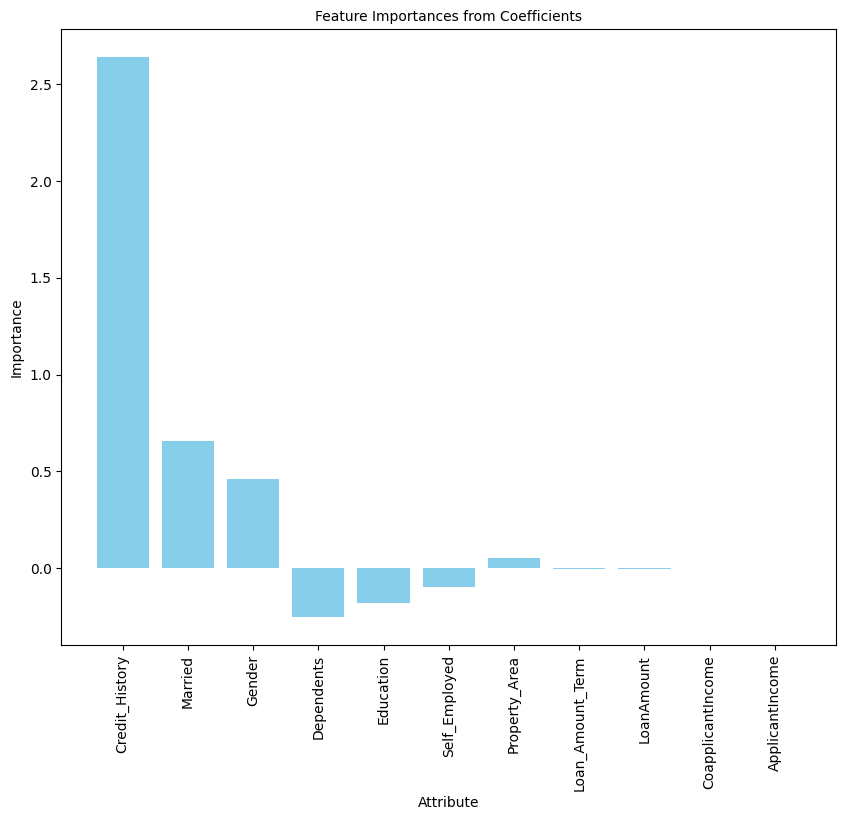

In [279]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Extract feature importances from coefficients
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

# Sort the importances by absolute value
importances['Abs_Importance'] = importances['Importance'].abs()
importances = importances.sort_values(by='Abs_Importance', ascending=False).reset_index(drop=True)

# Plot the importances
plt.figure(figsize=(10, 8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#87CEEB')
plt.title('Feature Importances from Coefficients', size=10)
plt.xlabel('Attribute')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.show()



**Decision Trees**

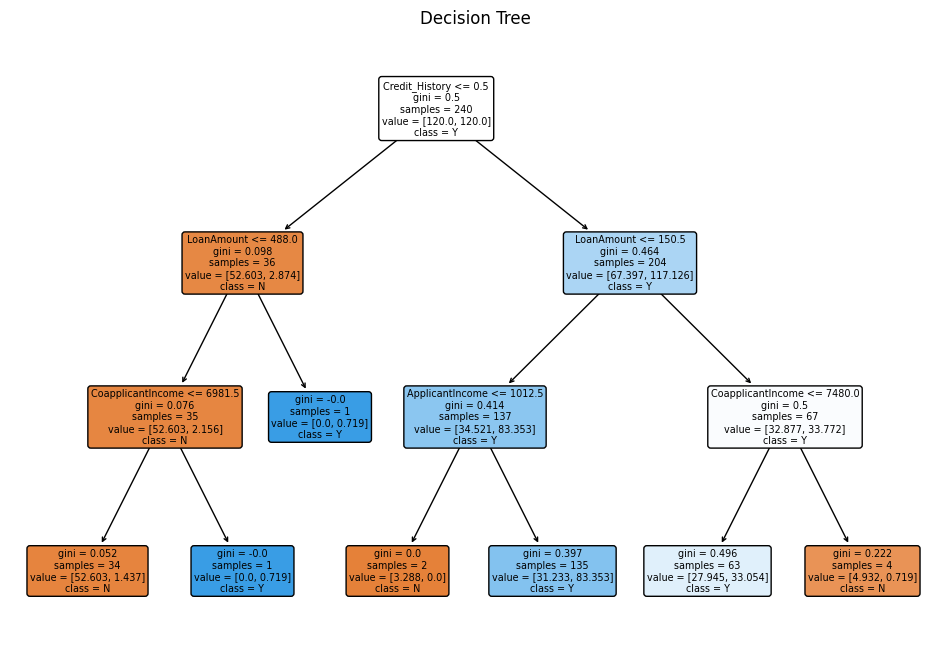

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


# Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.5, random_state=42)

# class weighting
dt_model = DecisionTreeClassifier(max_depth=3, class_weight='balanced')  # Set max_depth & class_weight
dt_model.fit(X_train_dt, y_train_dt)

# Visualize
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['N', 'Y'], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

Ποιο είναι το καλύτερο βάθος για τα decision trees;

In [281]:
from sklearn.model_selection import GridSearchCV

# θέτουμε παράμετρο για το max_depth
param_grid = {'max_depth': range(1, 21)}  # Try depths from 1 to 20

dt_classifier = DecisionTreeClassifier()

# cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dt, y_train_dt)

# best depth
best_depth = grid_search.best_params_['max_depth']

print("Best Depth:", best_depth)


Best Depth: 1


In [282]:
from sklearn.metrics import classification_report

y_pred_dt = dt_model.predict(X_test_dt)

classification_report_dt = classification_report(y_test_dt, y_pred_dt, target_names=['N', 'Y'])

print("Classification Report for Decision Tree Model:")
print(classification_report_dt)


Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           N       0.85      0.39      0.53        75
           Y       0.78      0.97      0.86       165

    accuracy                           0.79       240
   macro avg       0.81      0.68      0.70       240
weighted avg       0.80      0.79      0.76       240



In [283]:
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy for Decision Tree Model:", accuracy_dt)


Accuracy for Decision Tree Model: 0.7875


Έυρεση feature importances

In [284]:
importances = dt_model.feature_importances_
print(importances)


[0.         0.         0.         0.         0.         0.08408951
 0.07762816 0.11758006 0.         0.72070227 0.        ]


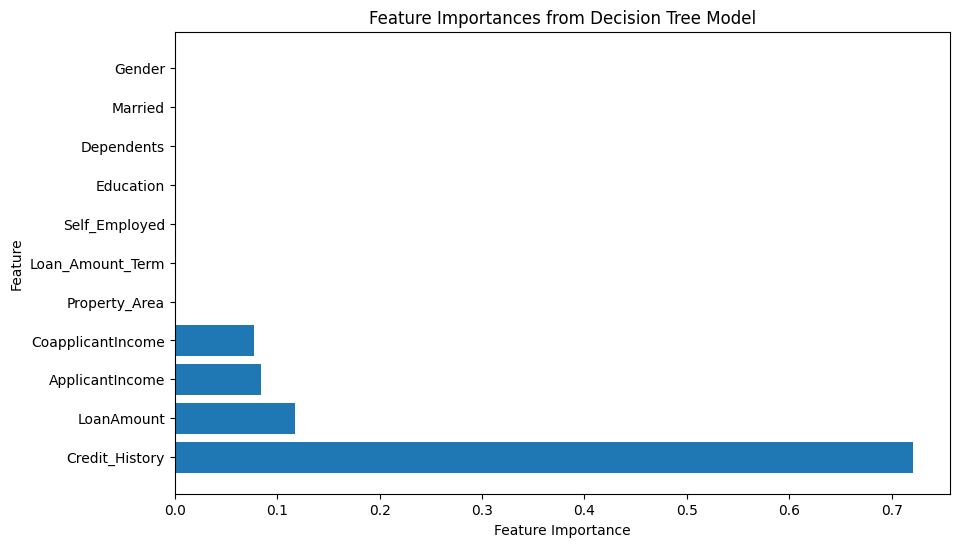

In [285]:
import matplotlib.pyplot as plt

importances = dt_model.feature_importances_

feature_names = X.columns

# Σορτάρισμα σε descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()


**Random Forest**

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# class weights to address class imbalance
class_counts = y_train.value_counts()
class_weights = {label: 1 / count for label, count in class_counts.items()}

rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7916666666666666
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.58        75
           1       0.79      0.97      0.87       165

    accuracy                           0.80       240
   macro avg       0.83      0.70      0.73       240
weighted avg       0.82      0.80      0.78       240



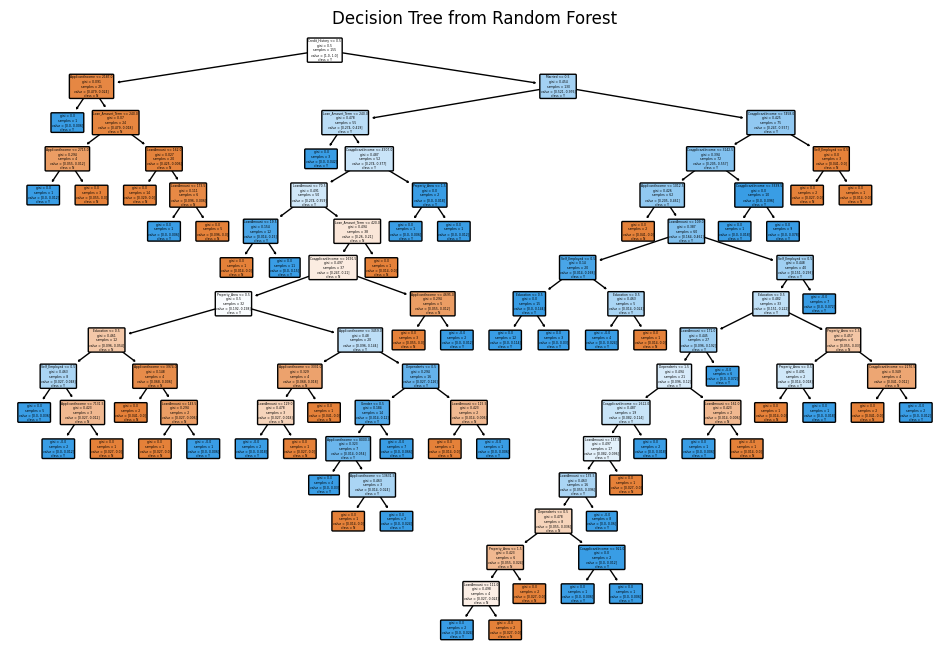

In [287]:
from sklearn.tree import plot_tree

# decision tree from the Random Forest
tree_index = 0

# Extract the decision tree
tree = rf_model.estimators_[tree_index]

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['N', 'Y'], filled=True, rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()


In [288]:
importances2 = rf_model.feature_importances_
print(importances2)

[0.02907886 0.02592414 0.04793394 0.03087674 0.025321   0.2108833
 0.11648019 0.20867197 0.03999211 0.2082347  0.05660305]


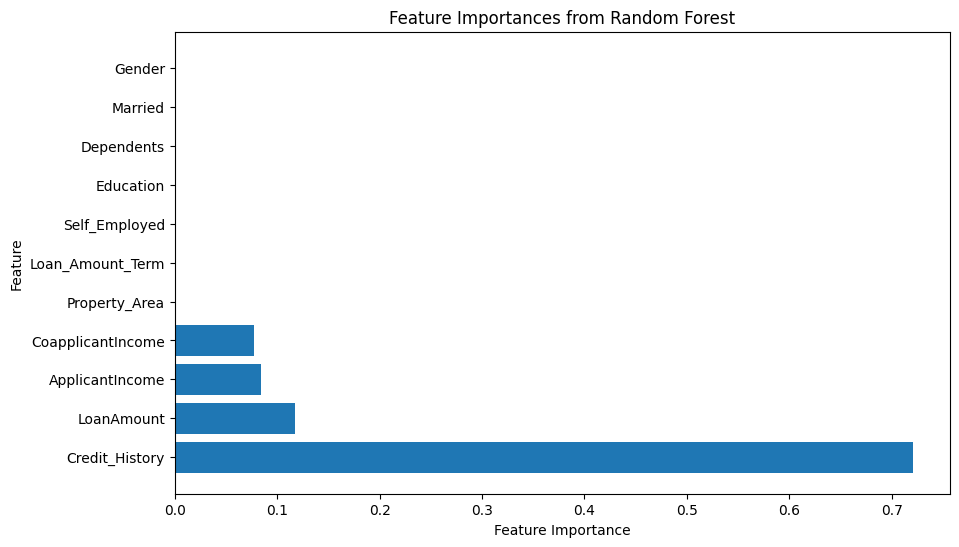

In [289]:
import matplotlib.pyplot as plt

importances2 = rf_model.feature_importances_

feature_names = X.columns

# Sort in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

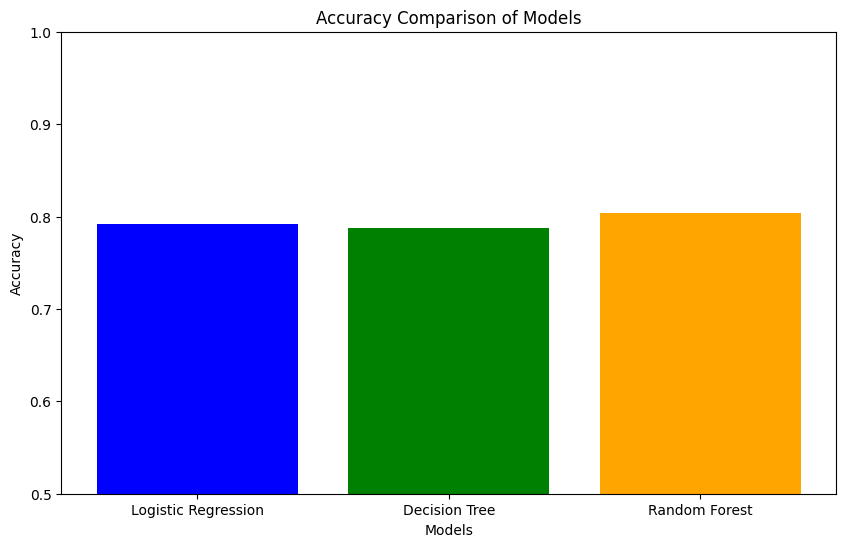

In [291]:
import matplotlib.pyplot as plt

accuracy_scores = [accuracy, accuracy_dt, accuracy_rf]

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0.5, 1)
plt.show()
